# “Фреймворк PyTorch для разработки искусственных нейронных сетей”

<img src='https://drive.google.com/uc?export=view&id=1v51-gWkPgQmtIhcGpmwuw81TGwMz7aM5'>

### План курса
* Первое занятие: Введение в PyTorch. Мы познакомимся с самим фреймворком, установим его, посмотрим минимальный набор функций для получения какого-либо результата
* Второе занятие: Детектирование в Pytorch. Здесь мы познакомимся с современными методами детектирования и реализуем простую модель. 
* Третье занятие: Сегментация изображений. Поговорим о том, как упаковывать данные для тренировки модели сегментации. Изучим и построим модель U-net.
* На четвертом занятии мы поговорим о генерации данных с помощью Generative adversarial networks.
* Пятое занятие: LSTM for human action recognition. Мы рассмотрим предложенные архитектуры, поработаем с различными данными и напишем свой собственный даталоадер.

# PyTorch, вводное занятие

### План занятия:

* Установка
* Тензоры
* Введение в синтаксис pytorch и Тензорные вычисления
* Вычислительный граф и Автоматическое диференцирование
* Погружаемся в детали
* Датасет
* Построение нейронной сети
* Обучения модели
* Сохранение и загрузка модели
* Tensorflow vs PyTorch
* Где полученные знания можно применить

# 0. Установка

In [ ]:
!pip3 install torch torchvision

# 1. Тензоры

Тензоры схожи с ndarrays в NumPy, с добавлением того, что тензоры могут быть использованы на GPU для ускорения вычислений.

### Тензоры

Тензор - основная структура данных в библиотеках машинного обучения, которая похожа на массив Numpy. Что-то вроде n-мерной матрицы или массива массивов.Тензоры обеспечивают ускорение различных математических операций. Эти операции при выполнении в большом количестве в глубоком обучении имеют огромное значение в скорости.

<img src='https://drive.google.com/uc?export=view&id=1pDiSoBIL8IBpIFq3R4OKGRW3YseBRvFm'>


Визуализизация тензора с более чем двумя осями:

<img src='https://drive.google.com/uc?Export=view&id=1C6pu0iDx1Ugz2OMyE9d6KZH9IcN3-STG'>
<img src='https://drive.google.com/uc?export=view&id=1cmVLwGNLc8fkDpmNZreTecMNCXgD6zGl'>
<img src='https://drive.google.com/uc?export=view&id=1XiGSZVsVQrlH279eu2IK1bekSvccX6aT'>


# 2. Введение в синтаксис pytorch и Тензорные вычисления

[База от pytorch](https://pytorch.org/tutorials/beginner/basics/intro.html)

In [ ]:
from IPython import display
import numpy as np
import random
import torch

In [ ]:
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

### 2.1 Тензоры в pytorch

Тип данных, хранимых тензором, отражается в имени его конструктора. Конструктор без параметров вернёт специальное значение — тензор без размерности, который нельзя использовать ни в каких операциях.

In [ ]:
torch.FloatTensor()

tensor([])

Типы тензоров в pytorch:

torch.HalfTensor      # 16 бит, с плавающей точкой  
torch.FloatTensor     # 32 бита,  с плавающей точкой  
torch.DoubleTensor    # 64 бита, с плавающей точкой  

torch.ShortTensor     # 16 бит, целочисленный, знаковый  
torch.IntTensor       # 32 бита, целочисленный, знаковый  
torch.LongTensor      # 64 бита, целочисленный, знаковый  

torch.CharTensor      # 8 бит, целочисленный, знаковый  
torch.ByteTensor      # 8 бит, целочисленный, беззнаковый  

torch.Tensor является сокращённым названием для torch.FloatTensor. Так же в последних версиях существует автоматическое приведение типов, если типы не сопоставимы:

In [ ]:
a = torch.FloatTensor([1.0])
b = torch.DoubleTensor([2.0])
print(a)
print(b)
a * b

tensor([1.])
tensor([2.], dtype=torch.float64)


tensor([2.], dtype=torch.float64)

Но где-то могут возникать проблемы в виду разных типов. Для этого предусмотрена возможность явного приведения типов:

In [ ]:
a = torch.IntTensor([1])
print(a.type())
a = a.byte()
print(a.type())

torch.IntTensor
torch.ByteTensor


In [ ]:
a.float()

tensor([1.])

### 2.2 Немного о различиях в функциях

Соглашение о именовании в PyTorch гласит, что любая функция вида xxx возвращает новый тензор, т.е. является immutable функцией. В противоположность ей функция вида xxx_ изменяет изначальный тензор, т.е. является mutable функцией. Последние ещё носят название inplace функций. 
Почти для любой immutable функции в PyTorch существует её собрат. Однако бывает и так, что функция существует лишь в каком-то одном варианте. По понятным причинам, функции, изменяющие размер тензора всегда являются immutable.

По поводу всех функций прошу [сюда](https://pytorch.org/docs/master/tensors.html). А сейчас мы коснемся лишь самых важных.

### 2.3 Инициализация

Начнем с того, как мы можем задать наш тензор. Полный список функций можно посмотреть в [официальном источнике](https://pytorch.org/docs/stable/torch.html) под заголовком Creation Ops. Вот некоторые разные варианты:

In [ ]:
a = [1. , 1.4 , 2.5]
a_tensor = torch.tensor(a)
print(f"type of tensor : ", a_tensor.type())
print(f"Simple way: {torch.tensor(a)}")
print(f"Via type : {torch.FloatTensor(a)}")
print(f"Zeros:\n {torch.zeros((2, 3))}")
print(f"Превращаем а в нули : {a_tensor.zero_()}")
print(f"Заполним тензор константой : {a_tensor.fill_(5)}")
print(f"Range: {torch.arange(0, 10)}")
print(f"Complicated range: {torch.arange(4, 12, 2)}")
print(f"Space: {torch.linspace(1, 4, 6)}")

type of tensor :  torch.FloatTensor
Simple way: tensor([1.0000, 1.4000, 2.5000])
Via type : tensor([1.0000, 1.4000, 2.5000])
Zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
Превращаем а в нули : tensor([0., 0., 0.])
Заполним тензор константой : tensor([5., 5., 5.])
Range: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Complicated range: tensor([ 4,  6,  8, 10])
Space: tensor([1.0000, 1.6000, 2.2000, 2.8000, 3.4000, 4.0000])


### 2.4 Случайная выборка

Теперь про то, как мы можем генерировать случайнные значения в наших тензорах. Полный список функций можно посмотреть по ссылке выше под заголовком Random sampling.

In [ ]:
print(f"From 0 to 1: {torch.rand(1)}")
print(f"Vector from 0 to 1: {torch.rand(5)}")
print(f"Vector from a normal distribution with mean 0 and variance 1: {torch.randn(2, 3)}")
print(f"Vector from 0 to 10: {torch.randint(10, size=(5,))}")
print(f"Непрерывное равномерное распределение : {a_tensor.uniform_(0, 5)}")

From 0 to 1: tensor([0.8823])
Vector from 0 to 1: tensor([0.9150, 0.3829, 0.9593, 0.3904, 0.6009])
Vector from a normal distribution with mean 0 and variance 1: tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])
Vector from 0 to 10: tensor([7, 6, 9, 6, 3])
Непрерывное равномерное распределение : tensor([4.1584, 0.5266, 1.3475])


### 2.5 Математические операции

С матричными операциями так же все аналогично с тем же numpy

In [ ]:
a = torch.arange(10).type(torch.FloatTensor)
b = torch.linspace(-10, 10, 10)
print(f"a: {a}\nshape: {a.size()}")
print(f"b: {b}\nshape: {b.size()}")

a: tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
shape: torch.Size([10])
b: tensor([-10.0000,  -7.7778,  -5.5556,  -3.3333,  -1.1111,   1.1111,   3.3333,
          5.5556,   7.7778,  10.0000])
shape: torch.Size([10])


In [ ]:
print(f"a + b: {a + b},\n a * b: {a * b}")
print(f"a + b: {a.add(b)},\n a * b: {a.mul(b)}") # вычитание sub, деление - div
print(f"a + b: {a.add_(b)},\n a * b: {a.mul_(b)}")

a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([ -0.0000,  -7.7778, -11.1111, -10.0000,  -4.4444,   5.5556,  20.0000,
         38.8889,  62.2222,  90.0000])
a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([ -0.0000,  -7.7778, -11.1111, -10.0000,  -4.4444,   5.5556,  20.0000,
         38.8889,  62.2222,  90.0000])
a + b: tensor([-10.0000,  -6.7778,  -3.5556,  -0.3333,   2.8889,   6.1111,   9.3333,
         12.5556,  15.7778,  19.0000]),
 a * b: tensor([100.0000,  52.7160,  19.7531,   1.1111,  -3.2099,   6.7901,  31.1111,
         69.7531, 122.7160, 190.0000])


In [ ]:
a = torch.arange(10).type(torch.FloatTensor)

print(f"Экспонента : {a.exp()},\n {torch.exp(a)}, \n {a.exp_()}")
print(f"Логарифм : {a.log()}")
print(f"Модуль : {a.abs()}")

Экспонента : tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03]),
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03]), 
 tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])
Логарифм : tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
Модуль : tensor([1.0000e+00, 2.7183e+00, 7.3891e+00, 2.0086e+01, 5.4598e+01, 1.4841e+02,
        4.0343e+02, 1.0966e+03, 2.9810e+03, 8.1031e+03])


In [ ]:
print(f"Скалярное произведение: {a.dot(b)}")
print(f"Mean: {a.mean()}, STD: {a.std()}")
print(f"Sum: {a.sum()}, Min: {a.min()}, Max: {a.max()}")

Скалярное произведение: 111618.328125
Mean: 1281.830810546875, STD: 2571.337890625
Sum: 12818.30859375, Min: 1.0, Max: 8103.083984375


In [ ]:
a.shape

torch.Size([10])

In [ ]:
print(f"Reshape:\n{a.reshape(-1, 1)}\nshape: {a.reshape(-1, 1).size()}")
c = a.reshape(-1, 1).repeat(1, 5)
print(f"Повторения:\n{c}\nshape: {c.size()}")
print(f"Транспонирование:\n{c.T}\nshape: {c.T.size()}")
print(f"Уникальные элементы: {torch.unique(c)}")

Reshape:
tensor([[1.0000e+00],
        [2.7183e+00],
        [7.3891e+00],
        [2.0086e+01],
        [5.4598e+01],
        [1.4841e+02],
        [4.0343e+02],
        [1.0966e+03],
        [2.9810e+03],
        [8.1031e+03]])
shape: torch.Size([10, 1])
Повторения:
tensor([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.7183e+00, 2.7183e+00, 2.7183e+00, 2.7183e+00, 2.7183e+00],
        [7.3891e+00, 7.3891e+00, 7.3891e+00, 7.3891e+00, 7.3891e+00],
        [2.0086e+01, 2.0086e+01, 2.0086e+01, 2.0086e+01, 2.0086e+01],
        [5.4598e+01, 5.4598e+01, 5.4598e+01, 5.4598e+01, 5.4598e+01],
        [1.4841e+02, 1.4841e+02, 1.4841e+02, 1.4841e+02, 1.4841e+02],
        [4.0343e+02, 4.0343e+02, 4.0343e+02, 4.0343e+02, 4.0343e+02],
        [1.0966e+03, 1.0966e+03, 1.0966e+03, 1.0966e+03, 1.0966e+03],
        [2.9810e+03, 2.9810e+03, 2.9810e+03, 2.9810e+03, 2.9810e+03],
        [8.1031e+03, 8.1031e+03, 8.1031e+03, 8.1031e+03, 8.1031e+03]])
shape: torch.Size([10, 5])
Тра

### 2.6 Индексирование

In [ ]:
a = torch.arange(100).reshape(10, 10)
print(f"Array:\n{a}\nshape: {a.size()}")
print(f"Get first column: {a[:, 0]}")
print(f"Get last row: {a[-1, :]}")
print(f"Add new aхis:\n{a[:, np.newaxis]}\nshape: {a[:, np.newaxis].size()}")
print(f"Specific indexing:\n{a[4:6, 7:]}")

Array:
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])
shape: torch.Size([10, 10])
Get first column: tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Get last row: tensor([90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Add new aхis:
tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],

        [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],

  

### 2.7 Из numpy в pytorch и обратно

In [ ]:
a = torch.normal(mean=torch.zeros(2,4))
a.numpy()

array([[ 0.66878796, -0.70770884, -0.32670644, -0.27880862],
       [-0.42198604, -1.3323241 , -0.36393228,  0.15133809]],
      dtype=float32)

In [ ]:
b = np.random.normal(size=(2, 4))
torch.from_numpy(b)

tensor([[ 0.4967, -0.1383,  0.6477,  1.5230],
        [-0.2342, -0.2341,  1.5792,  0.7674]], dtype=torch.float64)

### 2.8 CUDA

torch.cuda - это пакет для поддержки CUDA. Он поддерживает такую же функциональность как и CPU, но использует CUDA ядра для вычислений. С полным функционалом можно ознакомиться [здесь](https://pytorch.org/docs/stable/cuda.html?highlight=cuda#module-torch.cuda)

In [ ]:
print(f"Поддерживается ли CUDA : {torch.cuda.is_available()}")
print(f'Количество гпу девайсов: {torch.cuda.device_count()}')
print(f"Переключение между гпу девайсами: {torch.cuda.device(0)}")
print(f"Характеристики видеокарты : {torch.cuda.get_device_properties(0)}")
print(f"Удаляем всю незанятую память через torch.cuda.empty_cache()")
# Что бы следующая команда работала вам нужно сделать pip install pynvml
print(f"Следующие процессы происходят на нашей гпу : \n{torch.cuda.list_gpu_processes()}")

Поддерживается ли CUDA : True
Количество гпу девайсов: 1
Переключение между гпу девайсами: <torch.cuda.device object at 0x7f5b926e4b90>
Характеристики видеокарты : _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)
Удаляем всю незанятую память через torch.cuda.empty_cache()
Следующие процессы происходят на нашей гпу : 
GPU:0
no processes are running


Давайте посмотрим на практике как работать с cuda. Допустим мы инициализуем два тензора:

In [ ]:
a = torch.normal(mean=torch.zeros(2, 4))
b = torch.normal(mean=torch.zeros(2, 4))
print(f"a:\n{a}\nb:\n{b}")

a:
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380]])
b:
tensor([[ 0.4617,  0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890,  0.9580]])


Наши тензоры автоматом загружены в память cpu. Но мы легко можем перевести их на cpu таким способом:

In [ ]:
a = a.cuda()
a

tensor([[-0.3514, -0.7906, -0.0915,  0.2352],
        [ 2.2440,  0.5817,  0.4528,  0.6410]], device='cuda:0')

Теперь, если мы попробуем сложить эти два тензора, то у нас вылезет ошибка, т.к. один тензор на cpu, а другой на cuda:

In [ ]:
a + b

RuntimeError: ignored

Мы не можем производить никакие операции с тензорами, находящимеся на разных устройствах. Что бы сложить их нам нужно оба тензора перевести на одно устройство:

In [ ]:
a + b.cuda()

tensor([[ 0.1685, -0.2339, -0.0171,  0.9465],
        [ 1.6753,  1.8397, -1.1362, -0.4798]], device='cuda:0')

In [ ]:
a.cpu() + b

tensor([[ 0.1685, -0.2339, -0.0171,  0.9465],
        [ 1.6753,  1.8397, -1.1362, -0.4798]])

In [ ]:
(a + b.cuda()).cpu()

tensor([[ 0.1685, -0.2339, -0.0171,  0.9465],
        [ 1.6753,  1.8397, -1.1362, -0.4798]])

Так же мы можем задать следующее определение устройства. Если  есть куда, то выбираем куду. В ином случае - цпу:

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


У каждого тензора есть поле device, которое по умолчанию стоит cpu. Но мы можем менять его при инициализации или в процессе использования:

In [ ]:
torch.randn(10, 10, device=device)

tensor([[ 0.1940,  2.1614, -0.1721,  0.8491, -1.9244,  0.6530, -0.6494, -0.8175,
          0.5280, -1.2753],
        [-1.6621, -0.3033, -0.0926,  0.1992, -1.1204,  1.8577, -0.7145,  0.6881,
          0.7968, -0.0334],
        [ 1.4917, -0.5165, -0.2541,  1.4746, -0.3260, -1.1600,  2.3551, -0.6924,
          0.1837, -1.1835],
        [-1.8029, -1.5808,  0.8387,  1.4192,  0.6469,  0.4253, -1.5892,  0.6223,
          1.6898, -0.6648],
        [ 0.9425,  0.0783,  0.0847, -0.1408,  0.3316, -0.5890, -1.0723,  0.0954,
         -0.3347, -0.5258],
        [-0.8776,  0.3938,  0.1640, -0.1977,  1.0104, -1.3482, -0.3498, -0.6443,
          0.4468, -0.5371],
        [ 1.2423, -0.8146,  0.2502, -0.4273,  1.1044, -1.1028,  0.5543, -1.2847,
         -0.3816,  0.5139],
        [ 0.1002,  0.2586,  0.3617,  2.2787,  0.0233,  1.5828, -1.1592,  0.9484,
         -0.4573,  0.7605],
        [-0.5787, -0.7050, -0.7234, -0.5071, -0.4398, -0.4182,  0.1741,  0.4427,
          0.5069, -1.2168],
        [-0.2719,  

In [ ]:
a = torch.tensor((2 ,3))
print(a)

tensor([2, 3])


Переместить можно не только a.cuda(), но и так:

In [ ]:
a.to(device)

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380]], device='cuda:0')

Но следует запомнить что .cuda() immutable функция. Т.е. она возвращает новый тензор, а не перезаписывает существующий a:

In [ ]:
a

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380]])

Как видим наш тензор a все на том же cpu. Что бы интерпретатор запомнил что a у нас на куде необходимо присвоить значение выражение в тензор:

In [ ]:
a = a.cuda()

In [ ]:
a

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380]], device='cuda:0')

Проверяем, находится ли сейчас тензор на куде:

In [ ]:
a.is_cuda

True

# 3. Вычислительный граф и Автоматическое диференцирование

### 3.1 Вычислительный граф

Вычислительный граф — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Автоматическое дифференцирование - строительный блок не только в Pytorch, но и в каждой другой DL библиотеке. Движок автоматического дифференцирования в Pytorch называет [Autograd](https://pytorch.org/docs/stable/autograd.html). 

Современные архитектуры нейронных сетей могут иметь миллионы обучающихся параметров. С вычислительной точки зрения тренировка сети состоит из двух фаз:

1) Прямой проход для вычисления значения функции потерь.  
2) Обратный проход для вычисления градиентов обучаемых параметров.

Прямой проход весьма прямолинеен: выход одного слоя является входом другого.
Обратный проход немного сложнее, поскольку он требует от нас использования цепного правила для вычисления градиентов весов относительно функции потерь.

Ниже представлен простой пример вычислительного графа для вычисления выражения $\sigma(x*w_1 + w_0)$. Можно разбить вычисление на следующие шаги:

<img src='https://drive.google.com/uc?export=view&id=1jCTO6zBGyE8sYkkSv_6NENdFOiwuJCMC' width=600>

Преимущества использования вычислительного графа в том, что каждый узел является независимым функционирующим куском кода, если получит все необходимые входные данные. Это позволяет  оптимизировать производительность при выполнении расчетов, используя многоканальную обработку, параллельные вычисления.

### 3.3 PyTorch Autograd

Теперь, когда мы понимаем, что такое вычислительный граф, вернемся к PyTorch и разберемся, как это реализовано в PyTorch.

#### 3.3.1 Tензоры и requires_grad

Как мы видели выше, тензор - это структура данных, которая является фундаментальным строительным блоком PyTorch и они во многом похожи на массивы numpy, за исключением того, что в отличие от numpy, тензоры предназначены для использования преимуществ параллельных вычислений графического процессора(GPU).

In [ ]:
import torch
tsr = torch.Tensor(3,5)
tsr

tensor([[-5.0783e+08,  3.0718e-41,  2.2082e+00, -6.3800e-01, -4.7764e+09],
        [ 3.0718e-41, -4.7768e+09,  3.0718e-41, -4.7769e+09,  3.0718e-41],
        [-4.7770e+09,  3.0718e-41, -4.7758e+09,  3.0718e-41, -4.7772e+09]])

Вот он Tensor похожий на numpy ndarray. Структура данных, которая позволяет быстро выполнять операции линейной алгебры. Что бы сделать тензор обучающимся и мы бы смогли вычислить его градиент, необходимо поставить его параметр requires_grad в значение True.

requires_grad можно менять как при инициализации тензора, так и после:

In [ ]:
t1 = torch.randn((3, 3), requires_grad=True)
print(t1.requires_grad)
t2 = torch.FloatTensor(3, 3)
print(t2.requires_grad)

True
False


In [ ]:
t2.requires_grad = True
print(t2.requires_grad)

True


requires_grad заразителен. Это означает, что когда тензор создается с помощью других тензоров, для параметра requires_grad результирующего тензора будет установлено значение True, если хотя бы один из тензоров, используемых для создания, имеет для параметра requires_grad значение True.

*__Вопрос__: в каких ситуациях нам не нужен градиент для переменных?*

Для заморозки градиентов если нейронная сеть уже обучена.

In [ ]:
x = torch.ones(3, requires_grad=True)
x

tensor([1., 1., 1.], requires_grad=True)

В x у нас хранится информация о градиенте. Мы можем получить ее через метод grad:

In [ ]:
x.grad

В данном случае ничего нет, т.к. мы никаких действий с нашим тензором не производили.

Создадим переменную на основе x:

In [ ]:
z = (x ** 2) + 5.0 * x  # задание - посчитать производную руками

In [ ]:
z

tensor([6., 6., 6.], grad_fn=<AddBackward0>)

Мы вызываем метод backward и передаем ей единичный тензор:

In [ ]:
z.backward(x)

И тогда, когда мы выполнили эту функцию - мы вызываем градиент и мы получаем три 7ки:

In [ ]:
x.grad

tensor([7., 7., 7.])

<img src='https://drive.google.com/uc?export=view&id=1jCTO6zBGyE8sYkkSv_6NENdFOiwuJCMC' width=600>

In [ ]:
x = torch.FloatTensor([1])
w1 = torch.tensor([0.417], requires_grad=True)
w0 = torch.tensor([0.72], requires_grad=True)

a = x * w1
b = a + w0

sigma = torch.nn.functional.sigmoid(b)
mse = torch.nn.functional.mse_loss(sigma, x)
mse

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1709: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.0590, grad_fn=<MseLossBackward>)

In [ ]:
mse.backward()

In [ ]:
w1.grad, w0.grad

(tensor([-0.0893]), tensor([-0.0893]))

У каждого тензора есть атрибут grad_fn, который отсылается к функции (математическому оператору), создающему переменную. Если для параметра requires_grad установлено значение False, grad_fn будет равен None.

In [ ]:
a = torch.randn((3,3), requires_grad=True)

w1 = torch.randn((3,3), requires_grad=True)
w2 = torch.randn((3,3), requires_grad=True)
w3 = torch.randn((3,3), requires_grad=True)
w4 = torch.randn((3,3), requires_grad=True)

b = w1 * a
c = w2 * a

d = w3 * b + w4 * c

L = 10 - d

print("The grad fn for a is", a.grad_fn)
print("The grad fn for d is", d.grad_fn)

The grad fn for a is None
The grad fn for d is <AddBackward0 object at 0x7f0e472e8490>


Можно использовать функцию-член is_leaf, чтобы определить, является ли переменная листовым тензором или нет. Листовые тензоры - это тензоры, которые мы подаем в нашу систему вычислений. В нашем случае это а:

In [ ]:
a.is_leaf, w1.is_leaf

(True, True)

In [ ]:
L.is_leaf

False

#### 3.3.2 Function

Все математические операции в PyTorch реализуются классом [torch.nn.Autograd.Function](https://pytorch.org/docs/stable/autograd.html#function). У этого класса есть две важные функции-члены, на которые нам нужно обратить внимание.

Во-первых, это forward функция, которая просто вычисляет выходные данные, используя входные данные.

Функция backward принимает входящий градиент, исходящий от части сети перед ней. Как вы можете видеть, градиент, который должен распространяться в обратном направлении от функции f, - это, по сути, градиент, который передается обратно в f от слоев перед ним, умноженный на локальный градиент выходных данных f по отношению к его входам. Именно это и делает обратная функция.


Алгоритмически, вот как происходит обратное распространение с графом вычислений. (Не фактическая реализация, только пример):

In [ ]:
def backward(incoming_gradients):
    self.Tensor.grad = incoming_gradients

    for inp in self.inputs:
        if inp.grad_fn is not None:
            new_incoming_gradients = incoming_gradient * local_grad(self.Tensor, inp)

            inp.grad_fn.backward(new_incoming_gradients)
        else:
            pass

Здесь self.Tensor - это, тензор, созданный Autograd.Function, который использовался в нашем примере.

Входящие градиенты и локальные градиенты были описаны выше.

----

Чтобы вычислить производные в нашей нейронной сети, мы обычно обращаемся к тензору, представляющему нашу потерю. Затем мы возвращаемся по графику, начиная с узла, представляющего grad_fn наших потерь.

Как описано выше, обратная функция рекурсивно вызывается по графику, когда мы возвращаемся. Однажды мы достигаем листового узла, поскольку grad_fn равен None, но прекращаем возвращение по этому пути.

Здесь следует отметить, что PyTorch выдает ошибку, если вы вызываете backward () для векторного тензора. Это означает, что вы можете выполнять обратный вызов только для тензорного скалярного значения. В нашем примере, если мы предположим, что a - тензор с векторным значением, и обратимся к L, он выдаст ошибку.

In [ ]:
import torch 

a = torch.randn((3,3), requires_grad=True)

w1 = torch.randn((3,3), requires_grad=True)
w2 = torch.randn((3,3), requires_grad=True)
w3 = torch.randn((3,3), requires_grad=True)
w4 = torch.randn((3,3), requires_grad=True)

b = w1 * a 
c = w2 * a

d = w3 * b + w4 * c 

L = (10 - d)
print(L)

L.backward()

tensor([[ 9.9736, 10.9209,  8.4235],
        [10.0237, 10.0618,  8.3303],
        [ 9.8834,  9.9571,  8.7704]], grad_fn=<RsubBackward1>)


RuntimeError: ignored

Это потому, что градиенты могут быть вычислены относительно скалярных значений по определению. Вы не можете точно отличить вектор от другого вектора.

Если вы просто сделаете небольшое изменение в приведенном выше коде, установив L как сумму всех ошибок, наша проблема будет решена.

In [ ]:
import torch 

a = torch.randn((3,3), requires_grad=True)

w1 = torch.randn((3,3), requires_grad=True)
w2 = torch.randn((3,3), requires_grad=True)
w3 = torch.randn((3,3), requires_grad=True)
w4 = torch.randn((3,3), requires_grad=True)

b = w1 * a 
c = w2 * a

d = w3 * b + w4 * c 

# Replace L = (10 - d) by 
L = (10 - d).sum()
print(L)

L.backward()

tensor(82.8813, grad_fn=<SumBackward0>)


Как только это будет сделано, вы можете получить доступ к градиентам, вызвав атрибут grad в Tensor.

#### 3.3.3 Некоторые хитрости

1) requires_grad

Это атрибут класса Tensor. По умолчанию это False. Это удобно, когда вам нужно заморозить некоторые слои и запретить им обновлять параметры во время тренировки. Вы можете просто установить для параметра requires_grad значение False, и эти тензоры не будут участвовать в графе вычислений.

2) torch.no_grad()

Когда мы вычисляем градиенты, нам нужно кэшировать входные значения и промежуточные функции, поскольку они могут потребоваться для вычисления градиента позже.  Если нам нужно сохранить эти значения для вычисления градиента во время обратного прохода, это повлияет на объем памяти, занимаемой сетью.

С использованием torch.no_grad мы выполняем вывод нашей нейронной сети и мы не вычисляем градиенты и, следовательно, нам не нужно хранить эти значения. Фактически, во время вывода графа вычислений создавать не нужно, так как это приведет к бесполезному потреблению памяти.

PyTorch предлагает для этой цели диспетчер контекста, называемый torch.no_grad.

In [ ]:
with torch.no_grad():
    # inference code goes here 
    pass

# 4. Погружаемся в детали

Все основные модули которые будут рассматриваться ниже находятся в [torch.nn](https://pytorch.org/docs/stable/nn.html#). Все кроме оптимизаторов - они находятся в [torch.optim](https://pytorch.org/docs/stable/optim.html)

### 4.1. Слои

#### 4.1.1 Линейный слой (Линейное преобразование)

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)

$$y = xA^T + b$$

In [ ]:
layer = torch.nn.Linear(
    in_features=3,
    out_features=2,
    bias=True
)

In [ ]:
layer.weight, layer.bias

(Parameter containing:
 tensor([[-0.3586, -0.0716,  0.2350],
         [-0.5648,  0.1715, -0.3817]], requires_grad=True),
 Parameter containing:
 tensor([-0.2818,  0.2217], requires_grad=True))

#### 4.1.2 Сверточный слой (Convolutional layer)

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html?highlight=conv2d%20conv2d#torch.nn.Conv2d)

<img src='https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif'>

На гифке выше представлен вариант Conv2d. Т.е. мы проходим по картинке ядром (сверткой) и создаем карту признаков размера:  

$$H\_out = \frac{H\_in + 2*padding[0] - dilation[0]*(kernel\_size[0]-1)-1}{stride[0]}+1,\\W\_out = \frac{W\_in + 2*padding[1] - dilation[1]*(kernel\_size[1]-1)-1}{stride[1]}+1$$

Но в большинстве случаев картинка подается квадратная, и размер kernel_size тоже квадрат. При этом stride=1 , padding=0, dilation=1. Поэтому можно формулу выхода переписать упрощено следующим образом:  
Если размеры картинки равны AxA, а размеры  kernel_size KxK -> то размеры карты признаков равны:  

$$H\_out = W\_out = A - K + 1$$

Как реализовано в pytorch:

In [ ]:
layer = torch.nn.Conv2d(
    in_channels=2,
    out_channels=3,
    kernel_size=2,
    stride=1,
    padding=0,
    padding_mode='zeros',
    dilation=1,
    bias=True
)

In [ ]:
# 1 channel - 4 + 4 + 4
# 2 channel - 4 + 4 + 4
#             1   1   1
# 9 * 3 = 27

In [ ]:
layer.weight, layer.bias

(Parameter containing:
 tensor([[[[ 0.1615,  0.2029],
           [-0.3515,  0.3242]],
 
          [[ 0.2965,  0.1407],
           [-0.3231, -0.1263]]],
 
 
         [[[-0.1025, -0.0909],
           [ 0.1994,  0.1285]],
 
          [[ 0.2801, -0.1324],
           [ 0.1190,  0.1258]]],
 
 
         [[[-0.2944, -0.3430],
           [-0.1835,  0.2420]],
 
          [[-0.3329, -0.3077],
           [ 0.1981,  0.1908]]]], requires_grad=True), Parameter containing:
 tensor([ 0.2908, -0.2669, -0.2588], requires_grad=True))

Давайте слегка коснемся следующих параметров этого слоя:

##### 4.1.2.1 Padding


<img src='https://drive.google.com/uc?export=view&id=10YL2TmF0Yp56nbnPrdbVSX7ft982JMR2'>

К краям добавляются поддельные пиксели (обычно нулевого значения. За это отвечает параметр padding_mode. По дефолту он стоит "zero_padding"). За счет этого краевые пиксели могут учитываться по центру свертки. И мы можем получить выходную карту признаков такого же размера как и входная картинка.

##### 4.1.2.2 Stride


<img src='https://drive.google.com/uc?export=view&id=1MXz5etAzJtzi7MudLQ-Unr0n3j0h5aso'>

бывает такое, что необходимо получить на выходе карту признаков еще меньшего размера. Для этого обычно используются Polling слои(Об этом ниже). Но например в архитектурах семейства ResNet полностью отказались от этих слоев и пользуются как раз вторым вариантом. Их называют чередующимися свертками. По сути этот параметр отвечает за шаг свертки. При 1 берутся пролеты через 1 пиксель, при 2 - пролеты через каждые 2 пикселя.

##### 4.1.2.3 Dilate


<img src='https://www.mdpi.com/remotesensing/remotesensing-11-02220/article_deploy/html/images/remotesensing-11-02220-g001.png'>

Это так называемое рецептивное поле сверточного слоя. Оно расширяет пространство между элементами оригинальной свертки. Подробнее об этом можно узнать [здесь](https://towardsdatascience.com/understanding-2d-dilated-convolution-operation-with-examples-in-numpy-and-tensorflow-with-d376b3972b25)

Остальные сверточные слои реализованные в pytorch можно посмотреть [здесь](https://pytorch.org/docs/stable/nn.html#convolution-layers)

#### 4.1.2  Cубдискритизирующий слой (Downsampling, Polling Layer)

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html?highlight=pool#torch.nn.MaxPool2d)
<img src='https://www.mdpi.com/sensors/sensors-17-01535/article_deploy/html/images/sensors-17-01535-g005.png'>

В большинстве случаев, на вход такой сети приходят много маленьких матриц(обычно 2х2) и они последовательно объединяются в одно число(обычно max).


Как реализовано в pytorch:

In [ ]:
layer = torch.nn.MaxPool2d(
    kernel_size=2, 
    stride=2,
    padding=0,
    dilation=0
)

In [ ]:
layer.weight

AttributeError: ignored

Остальные пулинг слои реализованные в pytorch можно посмотреть [здесь](https://pytorch.org/docs/stable/nn.html#pooling-layers)

### 4.2. Инициализация весов и функции активации

#### 4.2.1 Проблема затухающего градиента

Инициализируются веса случайным образом. Но нужно правильным образом инициализировать веса этими случайными значениями чтобы все сошлось.
Почему очень часто люди выбирают Relu в качестве функции активации. Очень большая проблема - это проблема затухающего градиента. 
$$tanh(x) = \frac{2}{1+\mathrm{e}^{-2x}}-1 $$

Раньше нейросети обучали с помощью такой гладкой функцией нелинейности называемой гипорболическим тангенсом. С  ней есть следующая проблема. Предположим что на вход она получила какое-то большое число. Например 4. на выходе эта функия выдаст 1,т.к. 4 очень близко к месту насыщения. На обратном проходе она получит градиент который тоже равен 1. И что же она выдаст на выходе обратного распространения? А выдаст она 0, т.к. в этой точке функция уже не чувствительна к смещению.
Это значит, что как только мы вышли из эффективного пространства этой функции, она сразу уводит значения в 1 или -1 и после этого уже вывести его от туда сверх сложно. Т.к. любой градиент который мы в нее пошлем она превратит в близкое к нулю значение. 
И если наша система состоит из большого количества слоев таких функций, то как только любой из них доходит до такого значения - он сразу убивает возможность нормально тренироваться всей предыдущей части сети. 

<img src='https://cdn-images-1.medium.com/max/1024/1*XJXRG2ZCc1hHOiamSN3uhQ.png' width=800>

#### 4.2.2 Rectifier Linear Unit ReLU

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU)

А вот у ReLU нет такой проблемы, т.к. она нигде не выходит ни на какую ассимптоту. Она продолжает идти дальше по мере возрастания. Поэтому градиент никогда не затухает даже если очень много слоев впихнуть последовательно. 

<img src='https://i1.wp.com/debuggercafe.com/wp-content/uploads/2019/04/relu_plot.png' width=400>

Как реализовано в pytorch:

In [ ]:
torch.nn.ReLU()

ReLU()

Но у ReLU есть следующая проблема: бывает так, что  в какой-то момент у конкретной ReLU все точки датасета лежат в области < 0. Т.е. там градиент всегда ноль. Никакая оптимизация не сдвинет ему веса. Но на практике процент нейронов с такой функцией активации очень мал, что не особо мешает обучению.   
Но в современном мире есть альтернативные варианты для ReLU:

<img src='https://ekababisong.org/assets/ieee_ompi/Leaky-ReLU.png' width=600>

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU)

Как реализовано в pytorch:

In [ ]:
torch.nn.LeakyReLU(negative_slope=0.01)

LeakyReLU(negative_slope=0.01)

<img src='https://pbs.twimg.com/media/D654OBZUcAA87gG.jpg' width=500>

[pytorch doc](https://pytorch.org/docs/stable/generated/torch.nn.ELU.html#torch.nn.ELU)

Как реализовано в pytorch:

In [ ]:
torch.nn.ELU(alpha=1.0)

ELU(alpha=1.0)

С остальными функциями активации вы можете ознакомится [здесь](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) и [здесь](https://pytorch.org/docs/stable/nn.html#non-linear-activations-other)

#### 4.2.3 Инициализация весов

В самом простом варианте мы можем инициализировать наши веса следующим образом:

$$w = a * random(width, height)$$

Какая тут у нас может возникнуть проблема? Мы начинаем тренировку с того что подаем X и прогоняем его через большое количество слоев.   
Важный вопрос : как выбрать a? В чем проблема? Если мы например выберем a>>1, то каждый из следующих слоев будет умножать выход примерно на a, второй слой на а в квадрате и т.д. И это очень быстро растущая функция. В конце в итоге получится очень большое число, которое может выйти за пределы всех допустимых вычислений. И вернуть по этому числу градиент будет очень сложно.  
А если а<<1, то точно так же градиент будет затухать что приведет к проблеме затухающего градиента.  
Т.е. а нужно выбирать так, что бы функции активации не сильно увеличивались и не сильно уменьшались.

<img src='https://drive.google.com/uc?export=view&id=1ucOBrTAjt4RwlRK8IKsXftls-XOy1f22' width=600>

Есть методы, которые позволяют по размерам w вычислить это правильное значение а:

Со всеми можно познакомиться в разделе [torch.nn.init](https://pytorch.org/docs/stable/nn.init.html) 

##### 4.2.3.1 Xavier initialization

[статья](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.207.2059&rep=rep1&type=pdf)

$$a = \frac{1}{sqrt(in\_num)}\\W = a * random({in\_num}, {out\_num})$$


<img src='https://drive.google.com/uc?export=view&id=1ZzTgjrfAx0l2p_64K6TWZEcCze1cDML6' width=600>

Как реализовано в pytorch:

In [ ]:
torch.nn.init.xavier_normal_(torch.empty(3, 5))

tensor([[ 0.4419, -0.6252, -0.8126, -0.9780,  0.5915],
        [ 1.1033,  0.2076, -0.4783, -0.3229,  0.4562],
        [ 0.4227, -0.0036,  0.2897, -0.4601, -0.4864]])

##### 4.2.3.2 He initialization

[статья](https://arxiv.org/abs/1502.01852)

Небольшой апдейт метода выше. Предназначается для сетей с активацией ReLU. 

$$a = \frac{1}{sqrt(2/in\_num)}\\W = a * random({in\_num}, {out\_num})$$

<img src='https://drive.google.com/uc?export=view&id=1uZmbOPqQhK-JUg_e-1poGEF-O9-R4zLM' width=600>

Как реализовано в pytorch:

In [ ]:
torch.nn.init.kaiming_normal_(torch.empty(3, 5))

tensor([[-0.1562, -0.6274,  1.1749, -0.1625,  0.1592],
        [ 0.9483,  0.3413, -0.0859,  0.2203,  1.1989],
        [-0.1073,  0.2982, -0.3936, -0.7261,  1.3586]])

### 4.3. Оптимизаторы

Как конкретно мы собираемся обновлять параметры? Это про улучшенные методы градиентного спуска, которые есть в pytorch.
Все оптимизаторы можно найти в разделе [torch.optim](https://pytorch.org/docs/stable/optim.html)

#### 4.3.1 SGD  

В самом простом варианте , мы вычисляем наш градиент и умножаем на learningrate.
$$w = w - learning\_rate * gradient$$

Но оказывается что это не так уж и эффективно. На гифке ниже видны разные подходы оптимизаторов. Они из одной точки по-разному добираются до цели. Можно увидеть что в отличие от нашего простого метода(SGD) другие оптимизаторы выполняют свою работу намного быстрее. Это происходит в основном из-за неконстантного шага обучения:

<img src='https://i.stack.imgur.com/8rpzr.gif'>

Давайте подробнее посмотрим на эти оптимизаторы и как ими пользоваться в pytorch:

Как реализовано в pytorch:

In [ ]:
# в оптимизатор нужно передавать параметры, на которых 
# нужно обучаться (какие параметры, какие веса) и скорость обучения
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#### 4.3.2 Momentum (импульс)



[статья](https://arxiv.org/abs/1810.13395?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%253A+arxiv%252FQSXk+%2528ExcitingAds%2521+cs+updates+on+arXiv.org%2529)  
[pytorch doc](https://pytorch.org/docs/master/generated/torch.optim.SGD.html?highlight=sgd#torch.optim.SGD)

<img src='https://drive.google.com/uc?export=view&id=1JMoY1y1oZUtiicvCuhxhliiLBLoNl7bA' width=600>


$$velocity = momentum * velocity - \eta*gradient\\w = w + velocity$$

Как это математически объясняется: мы накапливаем некоторую скорость velocity, которая скорость вектора. Наш learningrate, который мы применяли к веса, теперь применяется к скорости. Т.е. по направлению градиента мы увеличиваем не просто веса, а скорость изменения весов. И есть такой момент затухания momentum, для того что бы было каке-то трение в системе, иначе все это улетит очень при очень далеко. И мы обычно берем momentum от 0.9-0.99. 
И таким образом мы берем старое значение скорости, его немного уменьшаем и добавляем к нему направление градиента. 



<img src='https://drive.google.com/uc?export=view&id=1h0u3hNo2cjDRoq0FVdXIScgRo6Iq687y' width=400>

Засчет добавления импульса получается сглаживание оптимизации.

|$t_1$|$t_2$|..|$t_n$|
|--|--|--|--|
|$g_1$|$g_2$|..|$g_n$|

$\gamma = 0.5$

$v_1 = g_1$<br>
$v_2 = \gamma * v_1 + g_2 = 0.5 * g_1 + g_2$<br>
$v_3 = \gamma * v_2 + g_3 = \gamma (\gamma * v_1 + g_2) + g_3 = \gamma^2 * g_1 + \gamma * g_2 + g_3 = 0.25 * g_1 + 0.5 * g_2 + g_3$<br>

Как реализовано в pytorch:

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

Другие методы предназначены для решения кейса "седловая точка". Седловая точка - это точка в которой формально градиент равен нулю. Но это не глобальный минимум. Он по некоторым направлениям локальный минимум, а по некоторым локальный максимум. Т.е. это не точка глобального минимума. И вообще было такое обсуждение, что методы градиентого спуска могут скатиться в локальные мимнимумы. Но оказывается на практике это сделать довольно сложно. Пространство на столько огромное, что найти настоящий глобальный минимум по этим тысячам параметров довольно сложно. И такой проблемы на практике скорее нет. А есть проблема, что метод может скатиться в такие точки, что градиент все еще ноль. И поэтому если мы в нем оказались, то очень сложно из него выйти, тк. нет сигнала от градиента. Но если отойти в определенном направлении, то можно понять что эта точка так же и локальный максимум. И после этого можно успешно скатиться. 
И поэтому есть несколько модификаций градиентного спуска, что бы как раз выкатываться из таких точек.

<img src='https://i.ytimg.com/vi/fODpu1-lNTw/maxresdefault.jpg' width=600>

#### 4.3.3 Adagrad

[статья](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf)  
[pytorch doc](https://pytorch.org/docs/master/generated/torch.optim.Adagrad.html?highlight=adagrad#torch.optim.Adagrad)

Собственно каким образом этим методам удается выходить из подобных точек.



Основная идея следующая - делать learning_rate не константой для всех измерений, а адаптивно для разных измерений и весов подбирать свой learning_rate. Если по какому-то направлению нам градиент будет говорить что там не интересно, там очень маленькое изменение, мы его искусственно повысим. А в тех направлениях где градиент  будет говорить что да, нужно во всю двигаться - мы наоборот его понизим. таким образом мы накапливаем статистику какие градиенты мы считаем наиболее важными или наименее важными. И усилим те которые считаются неважными. И это даст нам возможность выкатиться, потому что мы даже по неважным измерениям будем знать существенный шаг. А как только мы выкатились из этой точки, то сразу происходит существенное ускорение.   
Как мы это делаем:
$$accumulated = accumulated + gradient^2\\adaptive\_\eta = \frac{\eta}{sqrt(accumulated)}\\w = w - adaptive\_\eta*gradient$$

Мы таким образом считаем накопленный вес accumulated как квадрат градиента по всем направлениям. Т.е. если в каком-то направлении этот градиент будет большой - там этот квадрат мы накопим очень большой. А потом поделим на корень из него. Т.о. мы уменьшим adaptive_learning_rate в местах где градиент накопился и наоборот в обратном случае. И будем вот с таким adaptive_learning_rate обновлять наши веса. 

Как реализовано в pytorch:

In [ ]:
optimizer = torch.optim.Adagrad(model.parameters(), lr=0.1)

#### 4.3.4 RMSProp
[статья](https://arxiv.org/abs/1412.6980)  
[pytorch doc](https://pytorch.org/docs/master/generated/torch.optim.RMSprop.html)

Следующий апгрейт делает примерно тоже самое, но только применяет к аккумуляции релаксацию как в momentum'е.  
$$accumulated = \rho * accumulated + (1-\rho) * gradient^2\\adaptive\eta = \frac{\eta}{sqrt(accumulated)}\\w = w - adaptive\eta*gradient$$

Как реализовано в pytorch:

In [ ]:
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.1, alpha=0.99)

NameError: ignored

#### 4.3.5 Adam

[статья](https://arxiv.org/abs/1412.6980)  
[pytorch doc](https://pytorch.org/docs/master/generated/torch.optim.Adam.html?highlight=adam#torch.optim.Adam)

Этот метод комбинирует идеи RMSProp + Momentum. 

$$velocity = beta1 * velocity + (1-beta1) * gradient\\accumulated = beta2*accumulated + (1-beta2)*gradient^2\\adaptive\_\eta = \frac{\eta}{sqrt(accumulated)}\\w = w - adaptive\_\eta*velocity$$

Т.е. все так же есть adaptive_learning_rate, но мы применяем его не к обычному градиенту, а к скорости, которая вычисляется как в momentum'е. 

Как реализовано в pytorch:

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

Adam - такой хороший современный выбор по дефолту. Если не знаете какой оптимизатор использовать - берите его!

### 4.4 Алгоритм обучения в pytorch

In [ ]:
import torch
from torch import nn
from torch import optim

1. Для начала нам нужна модель через которую мы будем прогонять данные и получать какой-то результат. Для этого возьмем линейное преобразование:

In [ ]:
linear = nn.Linear(2, 2)

У слоя в pytorch мы всегда можем посмотреть веса и отклонение:

In [ ]:
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.5459,  0.1177],
        [-0.2296,  0.4370]], requires_grad=True)
b:  Parameter containing:
tensor([0.1102, 0.5713], requires_grad=True)


2. Теперь нам нужно определить функцию ошибок для посдчета градиента:

In [ ]:
criterion = nn.MSELoss()

3. Так же нам нужен оптимизатор который будет изменять веса нашей модели:

In [ ]:
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

4. Нам нужны данные (х) и верные метки (y) по которым мы поймем правильные ли предсказания делает модель. (В данном случае у нас всего пара значений (данные, метки). О том как организовывать много данных ниже и в дальнейших вебинарах):

In [ ]:
x = torch.randn(2, requires_grad=True)
y = torch.randn(2, requires_grad=False)

x, y

(tensor([-0.3639,  0.1513], requires_grad=True), tensor([-0.3514, -0.7906]))

5. Перед тем как считать градиенты и менять веса, нам нужно обнулить градиенты хранящиеся в свойстве тензора .grad. Это нужно делать на каждом шаге потому что torch эти градиенты накапливает и если их не обнулить, то они будут накапливаться до бесконечности. На каждом шагее обучения нужно явно подчищать градиенты. Для этого выполняем следующую строчку кода:

In [ ]:
optimizer.zero_grad()

6. Затем делаем предсказание на наших данных х, получаем предсказание модели и сохраняем это предсказание в переменную pred:

In [ ]:
pred = linear(x)

7. Переменная pred имеет ту же размерность, что и y. y - это наша правильная метка (ground truth). На этом этапе мы сравниваем предсказанное с реальным и получаем некую численную оценку этого через функцию потерь:

In [ ]:
loss = criterion(pred, y)
print('loss: ', loss, ' \nloss_item :', loss.item())

loss:  tensor(0.0631, grad_fn=<MseLossBackward>)  
loss_item : 0.0630771592259407


Стоит отметить, что если мы посмотрим на переменную .grad наших весов и отклонения, то ничего не будет:

In [ ]:
print('dL/dw: ', linear.weight.grad) 
print('dL/db: ', linear.bias.grad)

dL/dw:  None
dL/db:  None


Это потому что мы не начинали идти в обратном направлении и высчитывать градиенты.

8. Что ж, самое время это сделать. Проходим в обратном направлении и вычислим градиенты:

In [ ]:
loss.backward()

Теперь если мы посмотрим на grad весов, то уже что-то увидим:

In [ ]:
print('w: ', linear.weight.grad)
print('b: ', linear.bias.grad)

w:  tensor([[ 0.0748, -0.0014],
        [-0.0140,  0.0003]])
b:  tensor([-0.3492,  0.0652])


9. Теперь самое время поменять веса. Для этого надо сделать так называемый шаг оптимизатора. Здесь оптимизатор имея информацию о высчитанных градиентах и значениях весов меняет последние:

In [ ]:
# Веса до
print('BEFORE:\n','w: ', linear.weight)
print('b: ', linear.bias, '\n')

# Делаем шаг оптимизатора
optimizer.step()

# Веса после
print('AFTER:\n''w: ', linear.weight)
print('b: ', linear.bias)

BEFORE:
 w:  Parameter containing:
tensor([[-0.4562, -0.3210],
        [ 0.4946, -0.4838]], requires_grad=True)
b:  Parameter containing:
tensor([-0.3899,  0.5162], requires_grad=True) 

AFTER:
w:  Parameter containing:
tensor([[-0.4570, -0.3210],
        [ 0.4947, -0.4838]], requires_grad=True)
b:  Parameter containing:
tensor([-0.3864,  0.5155], requires_grad=True)


# 5. Датасет

Для удобства в PyTorch предоставляется ряд утилит для загрузки датасетов, их предварительной обработки и взаимодействия с ними. Эти вспомогательные классы находятся в модуле torch.utils.data module. Здесь следует обратить внимание на две основные концепции:

1. Dataset, инкапсулирующий источник данных,  
2. DataLoader, отвечающий за загрузку датасета, возможно, в параллельном режиме.  



In [ ]:
import torch
import torchvision
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch, torchvision

### 5.1 Загрузка Данных

Давайте теперь загрузим данные. Для этого мы будем использовать классы torch.utils.data.Dataset и torch.utils.data.Dataloader из [torch.utils.data](https://pytorch.org/docs/stable/data.html). Все датасеты картинок из pytorch представлены в [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html). Возьмем от туда CIFAR10.

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(
    root='data/',  # путь, куда будут скачиваться данные(если download=true), 
                   # или где лежат данные(dowload=False)
    train=True,    # говорим что используем датасет для обучения  
    transform=transforms.ToTensor(), # преобразуем данные в формат тензоров
    download=True, # True - надо скачать и положить в root.  False - уже скачано
)


image, label = train_dataset[0]
print(image.shape)
print(label)


Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


In [ ]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 
           'frog', 'horse', 'ship', 'truck']

In [ ]:
# поменять порядок канал - размерность
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

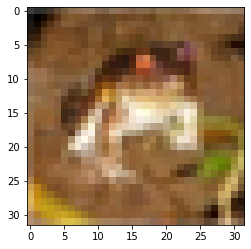

In [ ]:
plt.imshow(image.permute(1, 2, 0));

### 5.2 Даталоадер

In [ ]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=64, 
    shuffle=True
)

torch.Size([64, 3, 32, 32]) torch.Size([64])
deer


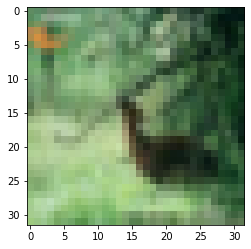

In [ ]:
for imgs, labels in train_loader:
    print(imgs.shape, labels.shape)
    print(classes[labels[0]])
    plt.imshow(imgs[0].permute(1, 2, 0))
    break

Делаем все тоже самое для тестового набора данных:

In [ ]:
test_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=8,
    shuffle=False
)

Files already downloaded and verified


# 6. Построение нейронной сети

В этой части мы реализуем нейронную сеть для классификации изображений CIFAR-10. Мы расскажем о реализации нейронной сети, конвейера загрузки данных и уменьшающейся скорости обучения.

Прежде чем мы начнем, позвольте отметить, что цель этого руководства не в достижении максимально возможной точности при выполнении задачи, а в том, чтобы показать вам, как использовать PyTorch.

Модуль torch.nn является краеугольным камнем проектирования нейронных сетей в PyTorch. Этот класс можно использовать для реализации такого уровня, как полностью связанный слой, сверточный слой, pooling слой, функция активации, а так же целую нейронную сеть, создав экземпляр объекта torch.nn.Module

Несколько объектов nn.Module можно связать вместе, чтобы сформировать более крупный объект nn.Module, таким образом мы можем реализовать нейронную сеть, используя множество слоев. Фактически, nn.Module может использоваться для представления произвольной функции f в PyTorch.

У класса nn.Module есть два метода, которые необходимо переопределить:

1) __init__ - эта функция вызывается при создании экземпляра nn.Module. Здесь вы определяете различные параметры слоя, такие как фильтры, размер ядра для сверточного слоя, вероятность dropout-слоя и другие параметры.  
2) forward - здесь вы определяете, как рассчитывается ваш вывод. Эту функцию не нужно вызывать явно, и ее можно запустить, просто вызвав экземпляр nn.Module как функцию с вводом в качестве аргумента.

In [ ]:
from torch import nn


# Очень простой слой
class MyLayer(nn.Module):
    def __init__(self, param):
        super().__init__()
        self.param = param 
  
    def forward(self, x):
        return x * self.param

myLayerObject = MyLayer(5)
output = myLayerObject(torch.Tensor([5, 4, 3]))
print(output)

tensor([25., 20., 15.])


Другой широко используемый и важный класс - это класс nn.Sequential. При запуске этого класса мы можем передать список объектов nn.Module в определенной последовательности. Объект, возвращаемый nn.Sequential, сам по себе является объектом nn.Module. Когда этот объект запускается с вводом, он последовательно пропускает ввод через весь объект nn.Module, который мы ему передали, в том же порядке, в котором мы их передали.

In [ ]:
combinedNetwork = nn.Sequential(MyLayer(5), MyLayer(10))
combinedNetwork

Sequential(
  (0): MyLayer()
  (1): MyLayer()
)

Давайте теперь приступим к реализации нашей классификационной сети.

Определим следующую модель:

In [ ]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        # инициализируем слои
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3,
                               out_channels=6,
                               kernel_size=5)
        # один пулинг т.к. нет весов и он одинаковый
        self.pool = nn.MaxPool2d(kernel_size=2,
                                 stride=2)
        self.conv2 = nn.Conv2d(in_channels=6,
                               out_channels=16,
                               kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5,
                             out_features=120)
        self.fc2 = nn.Linear(in_features=120,
                             out_features=84)
        self.fc3 = nn.Linear(in_features=84,
                             out_features=10)
        # 2 свертки 5×5, после каждой свертки maxpooling. 
        # 1-ая свертка: (3, 32, 32) -> (6, 28, 28)
        # pool: (6, 28, 28) -> (6, 14, 14)
        # 2-ая свертка: (6, 14, 14) -> (16, 10, 10)
        # pool: (16, 10, 10) -> (16, 5, 5)

    def forward(self, x):
        # объединяем и связываем слои
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cuda')

*__Вопрос__: Почему пользуемся одним пулингом, а не инициализируем разные для разных слоев сверток?*

In [ ]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# инициализируем ошибку. классификация, значит возмём кросс-энтропию
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
%%time
num_epochs = 10

# нет как в Keras метода fit, всё надо писать
for epoch in range(num_epochs):
    # инициализируем значение функцию потерь
    running_loss = 0.0  # Для вывода процесса обучения
    # сколько объектов увидели
    running_items = 0.0
    
    # проходимся по генератору и получаем батч объектов для обучения
    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)

        # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание, не обращаясь к методу forward,
        # а передавая входы в сеть. По факту будет вызов forward'а
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        # нет стандартного вывода как в Keras
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            # очищаем статистику
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/10]. Step [1/782]. Loss: 0.036
Epoch [1/10]. Step [301/782]. Loss: 0.036
Epoch [1/10]. Step [601/782]. Loss: 0.036
Epoch [2/10]. Step [1/782]. Loss: 0.036
Epoch [2/10]. Step [301/782]. Loss: 0.036
Epoch [2/10]. Step [601/782]. Loss: 0.035
Epoch [3/10]. Step [1/782]. Loss: 0.033
Epoch [3/10]. Step [301/782]. Loss: 0.032
Epoch [3/10]. Step [601/782]. Loss: 0.031
Epoch [4/10]. Step [1/782]. Loss: 0.032
Epoch [4/10]. Step [301/782]. Loss: 0.030
Epoch [4/10]. Step [601/782]. Loss: 0.030
Epoch [5/10]. Step [1/782]. Loss: 0.027
Epoch [5/10]. Step [301/782]. Loss: 0.029
Epoch [5/10]. Step [601/782]. Loss: 0.029
Epoch [6/10]. Step [1/782]. Loss: 0.029
Epoch [6/10]. Step [301/782]. Loss: 0.028
Epoch [6/10]. Step [601/782]. Loss: 0.027
Epoch [7/10]. Step [1/782]. Loss: 0.029
Epoch [7/10]. Step [301/782]. Loss: 0.026
Epoch [7/10]. Step [601/782]. Loss: 0.025
Epoch [8/10]. Step [1/782]. Loss: 0.026
Epoch [8/10]. Step [301/782]. Loss: 0.025
Epoch [8/10]. Step [601/782]. Loss: 0.024
Epoch [9

# 6. Загрузка и сохранение модели

### 6.1 Сохранение модели

Можем сохранять либо веса, либо модель с весами

In [ ]:
# сохраняем веса. Архитектуру модели нужно обязательно тоже сохранить (отдельно)
PATH_WEIGHTS = './cifar_net_test_version_weights.pth'
torch.save(net.state_dict(), PATH_WEIGHTS)

In [ ]:
print("Model state_dict: ")
for param in net.state_dict():
    print(param, "\t", net.state_dict()[param].size())

Model state_dict: 
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])


In [ ]:
# 2-й способ: сохраняем модель полностью со всей архитектурой и весами
PATH_MODEL = './cifar_net_test_version_model.pth'
torch.save(net, PATH_MODEL)

### 6.2 Загрузка и использование модели 

In [ ]:
# инициализируем модель
net = Net()
# подгружаем к ней веса
net.load_state_dict(torch.load(PATH_WEIGHTS))
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# 2-й способ - подгружаем модель с весами
net = torch.load(PATH_MODEL)
net.to('cpu')

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Посмотрим как модель работает на тесте.

In [ ]:
# берём один объект
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:  cat ship ship plane frog frog car frog


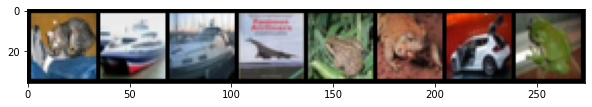

In [ ]:
# прогоняем через сеть
outputs = net(images)
# отрисовываем картинки с помощью торча и истинные метки
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [ ]:
# линейный выход. работает как вероятность - чем больше, тем больше вероятность
print(outputs)

tensor([[-0.8204,  0.3746,  0.4533,  1.3054,  0.1365,  1.0049,  0.0915, -1.4121,
          0.4212, -0.8952],
        [ 3.7632,  4.5290, -1.0295, -2.9887, -1.7876, -4.0010, -5.2768, -2.2075,
          4.3952,  3.5601],
        [ 2.4597,  4.9167, -1.3548, -1.6817, -2.4444, -2.1983, -5.2265, -1.6216,
          3.0788,  3.5463],
        [ 3.6195,  3.1902,  0.1350, -1.7492, -0.6893, -2.8791, -3.9275, -2.1349,
          3.7847,  1.0094],
        [-1.3975, -3.7336,  2.1198,  2.0333,  2.2746,  1.5645,  2.6139, -0.4489,
         -2.2830, -2.6431],
        [-0.3082, -0.1018,  0.2515, -0.3346,  0.8932, -0.6641,  2.2761, -0.8294,
         -2.0538, -1.1813],
        [-0.0393,  2.9446,  0.6929,  1.5183, -2.4838,  1.1361, -2.6712, -0.9327,
         -0.6705,  0.6625],
        [-1.0623, -2.9638,  1.0411,  1.0074,  1.9223,  0.7561,  2.7615, -0.2589,
         -2.0202, -1.9967]], grad_fn=<AddmmBackward>)


In [ ]:
# выводи максимальное значение. 1- по какой размерности ищем максимальное - ищем в каждой строчке
_, predicted = torch.max(outputs, 1)

predicted

tensor([3, 1, 1, 8, 6, 6, 1, 6])

In [ ]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  cat car car ship frog frog car frog


In [ ]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

# истинные
print(gt)
# предсказанные
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['cat' 'ship' 'ship' 'plane' 'frog' 'frog' 'car' 'frog']
['cat' 'car' 'car' 'ship' 'frog' 'frog' 'car' 'frog']
Accuracy is 0.625


#  7. Tensorflow vs PyTorch:

<img src='https://drive.google.com/uc?export=view&id=13SNw7d9JGT8lHMrKN2-mNgYrqKqkNXfG'>

* Отладка
* Определение графа - верно для старых версий, в Октябре 2019 года добавили поддержку подобного стиля программирования (стало не нужно использование плейсхолдеров - заглушек).

#### Различия:

PyTorch разработал Facebook Lab в 2016 году, здесь динамическое определение графа. А Tensorflow разрабатывался командой Google Brains в 2015 и до 2019 года граф определялся только статически.

В TensorFlow граф определяется статически перед запуском модели. Связь осуществляется с помощью объекта tf.Session и tf.Placeholder — тензорами, которые во время выполнения программы будут заменены внешними данными.

В PyTorch можно определять, изменять и выполнять узлы как вам угодно без дополнительных session- и placeholder-интерфейсов. Когда вы пишите на TensorFlow, иногда кажется, что с моделью можно связываться через несколько крошечных отверстий в кирпичной стене, за которой и прячется модель.

Существуют архитектуры нейронных сетей, которые получают преимущества от динамического подхода. RNN со статическим графом длина входной последовательности остается постоянной. Это означает, что необходимо зафиксировать длину предложения на максимальном значении, а все более мелкие последовательности заполнять нулями.

Но теперь и в Tensorflow и PyTorch есть возможность динамического определения графа.


<img src='https://drive.google.com/uc?export=view&id=1YceAfoUFkzUo_nHPwpwW8OuklFlQGMwu'>

[Ссылка](https://chel-center.ru/python-yfc/2020/12/22/pytorch-protiv-tensorflow-dlya-vashego-proekta-glubokogo-obucheniya-python/) на статью где хорошо объясняется различие pytorch от tensorflow.

# 8. Где полученные знания можно применять

В этом курсе мы будем изучать и использовать pytorch для работы с изображениями. Соотвественно решать задачу компьютерного зрения.  
Но помимо компьютерного зрения pytorch можно использовать в следующих областях:
* Распознавание и синтез аудио. Об этом [torchaudio](https://pytorch.org/audio/stable/index.html)  
* Так же с инструментом pytorch можно заниматься регрессионными проблемами, прогнозирования временных рядов. Например предсказывать цены на определенные валюты, акции, дома и т.д. [ссылка](https://www.machinelearningmastery.ru/lstm-for-time-series-prediction-de8aeb26f2ca/)
* [Задачи NLP](https://pytorchnlp.readthedocs.io/en/latest/index.html#)  
* Можно генерировать разную информацию от картинок до текста и аудио.

В общем pytorch можно применять везде где используются нейронные сети.

[Бонус](https://www.8host.com/blog/kak-ustanovit-i-ispolzovat-pytorch/): зайдите по ссылке и долистайте до "Экосистема Pytorch"

# Домашнее задание

1. Добиться хорошего результата от модели, собранной на занятии (6 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;
- *преобразование данных transform

2. *Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

# Дополнительные материалы
1. [Pytorch vs Tensorflow in 2020](https://towardsdatascience.com/pytorch-vs-tensorflow-in-2020-fe237862fae1)
2. [Официальная документация PyTorch](https://pytorch.org/tutorials/)

# Определения


**Вычислительный граф** — это иллюстрированная запись какой-либо функции, состоящая из вершин и рёбер. Вершины (или узлы) — вычислительные операции, которые необходимо выполнить, а рёбра связывают их в определённую последовательность.

Шаги обучения PyTorch:
1. Проход по батчу
2. Обнуление градиента
3. Предсказание модели на батче
4. Подсчет ошибки
5. Подсчет градиентов
6. Шаг оптимизации
7. Логирование информации